In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from mpl_toolkits import mplot3d
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('dataset_insurance4.csv')
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


# Evaluation des données

In [5]:
data.shape

(1338, 7)

In [6]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Identifions les variables qui influencent la variable cible


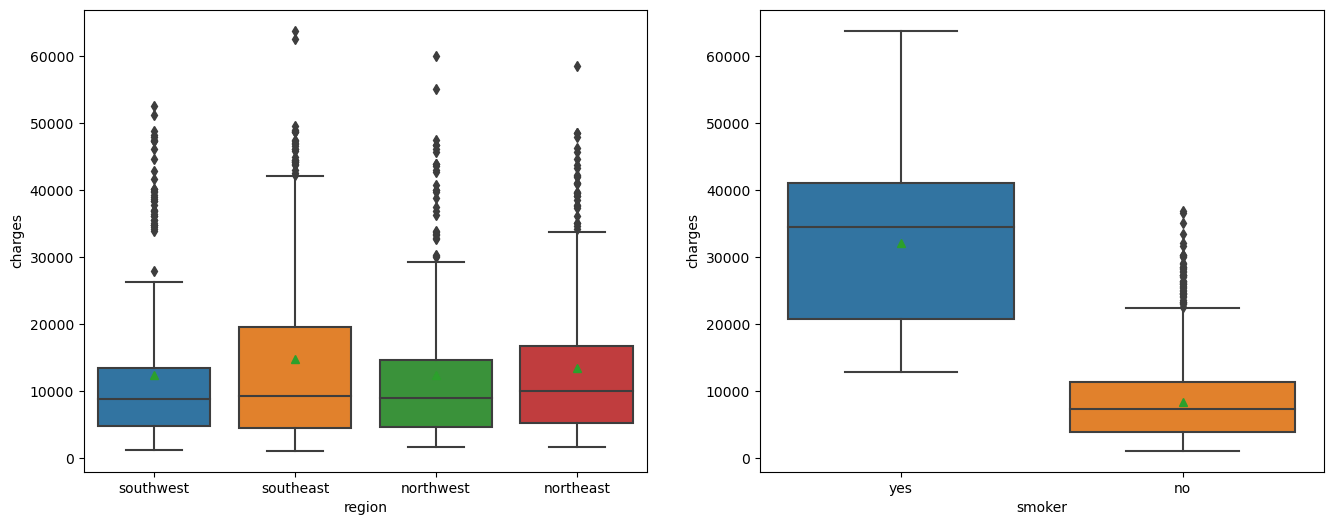

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(16,6))
plt.ticklabel_format(style='plain', axis='y')

sns.boxplot(x= data["region"], y = data["charges"], data= data, ax=axes[0], showmeans=True);
sns.boxplot(x= data["smoker"], y = data["charges"], data= data, ax=axes[1], showmeans=True);

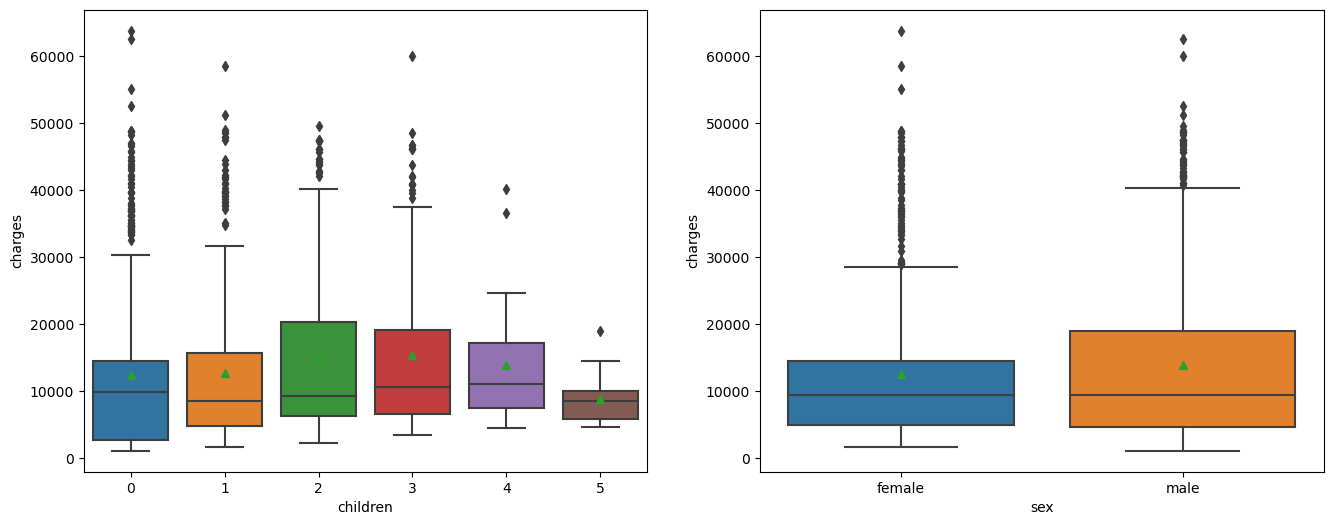

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(16,6))
plt.ticklabel_format(style='plain', axis='y')

sns.boxplot(x= data["children"], y = data["charges"], data= data, ax=axes[0], showmeans=True);
sns.boxplot(x= data["sex"], y = data["charges"], data= data, ax=axes[1], showmeans=True);

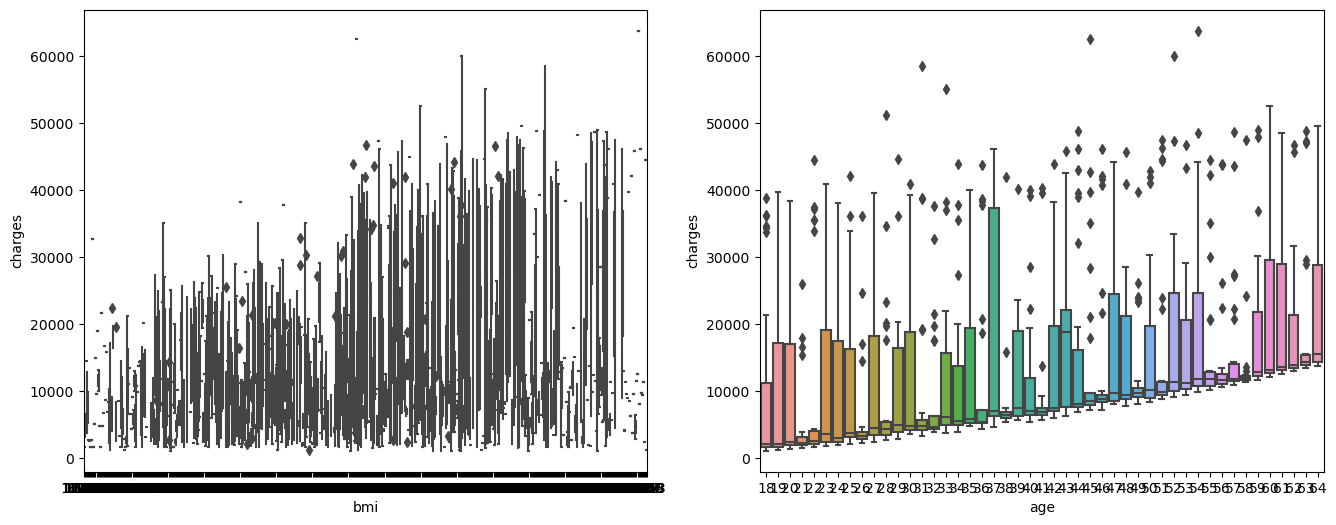

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(16,6))
plt.ticklabel_format(style='plain', axis='y')

sns.boxplot(x= data["bmi"], y = data["charges"], data= data, ax=axes[0]);
sns.boxplot(x= data["age"], y = data["charges"], data= data, ax=axes[1]);

### Gérons les valeurs aberrantes


In [18]:
def outlier(df):
    list_outlier_col = ['charges','age','bmi'] #colonnes concernées
    for i in list_outlier_col :
        #limite superieure
        upper_limit = df[i].quantile(0.95)
        #limite inferieure
        lower_limit = df[i].quantile(0.05)
        df[i] = df[i].clip(lower = lower_limit, upper =  upper_limit)
    return df

In [19]:
data = outlier(data)

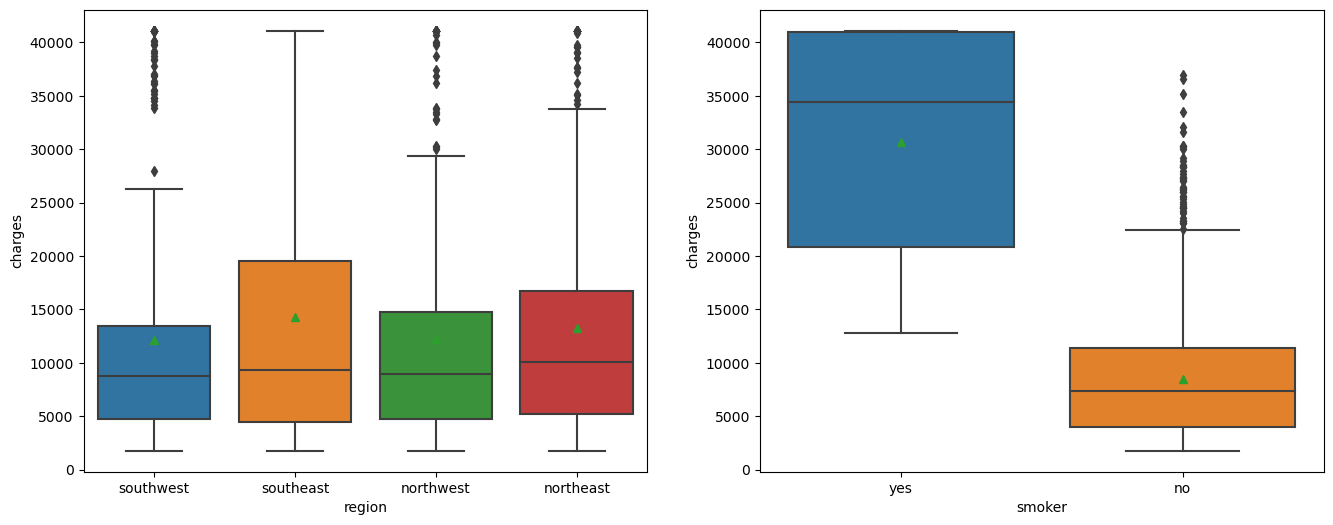

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(16,6))
plt.ticklabel_format(style='plain', axis='y')

sns.boxplot(x= data["region"], y = data["charges"], data= data, ax=axes[0], showmeans=True);
sns.boxplot(x= data["smoker"], y = data["charges"], data= data, ax=axes[1], showmeans=True);

### Vérifions la corrélation entre les variables

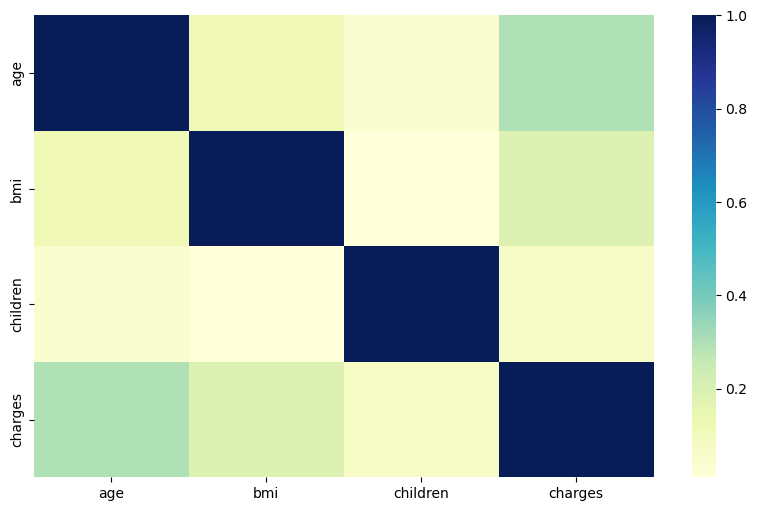

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), cmap="YlGnBu");

In [22]:
data_corr = data.copy()

In [23]:
#En utilisant sklearn label encoder
from sklearn.preprocessing import LabelEncoder
#Variable sex
le = LabelEncoder()
le.fit(data_corr.sex.drop_duplicates())
data_corr.sex = le.transform(data_corr.sex)
# Variable smoker
le.fit(data_corr.smoker.drop_duplicates()) 
data_corr.smoker = le.transform(data_corr.smoker)
#Variable region
le.fit(data_corr.region.drop_duplicates()) 
data_corr.region = le.transform(data_corr.region)

In [24]:
data_corr.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,0,27.900,0,1,3,16884.924000
1,18.0,1,33.770,1,0,2,1759.302346
2,28.0,1,33.000,3,0,2,4449.462000
3,33.0,1,22.705,0,0,1,21984.470610
4,32.0,1,28.880,0,0,1,3866.855200


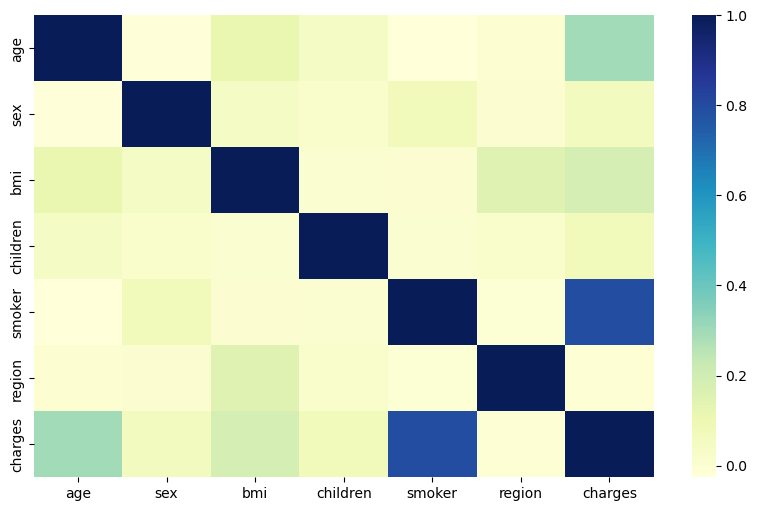

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(data_corr.corr(), cmap="YlGnBu");

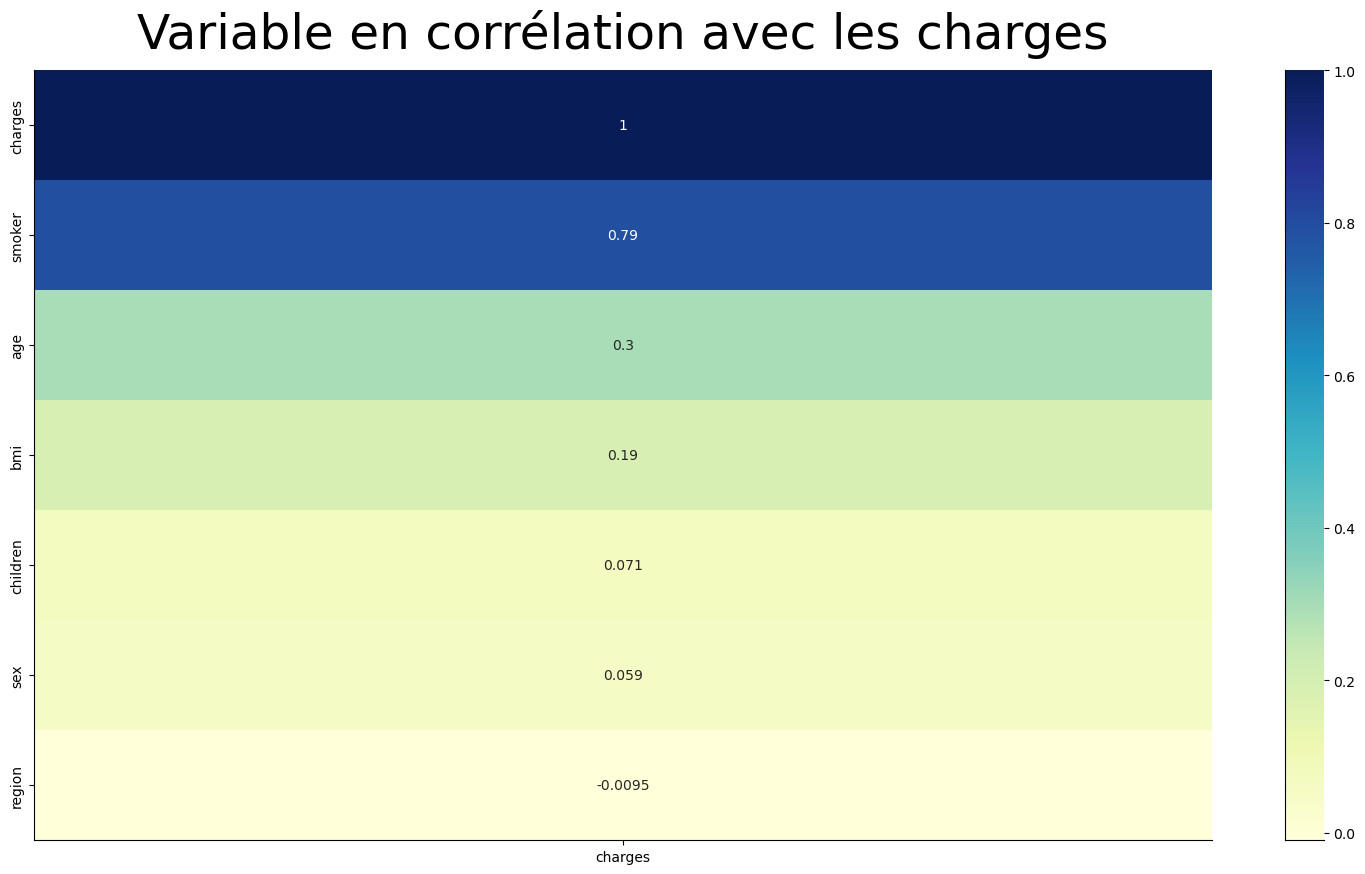

In [26]:
plt.figure(figsize=(19,10))
heatmap = sns.heatmap(data_corr.corr()[['charges']].sort_values(by='charges', ascending=False), annot=True, cmap='YlGnBu')
heatmap.set_title('Variable en corrélation avec les charges', fontdict={'fontsize':35}, pad=16);
sns.despine()
plt.show()

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0, 1)) 
data_corr['age']=scaler.fit_transform(data_corr[['age']])
data_corr['bmi']=scaler.fit_transform(data_corr[['bmi']])
data_corr['children']=scaler.fit_transform(data_corr[['children']])
data_corr.sample(10)

,age,sex,bmi,children,smoker,region,charges
1060,0.136364,1,0.541381,0.0,0,2,1981.581900
681,0.022727,1,0.000000,0.0,0,3,1759.302346
972,0.090909,0,0.000000,0.0,0,1,2527.818650
413,0.159091,1,0.132212,1.0,0,3,5080.096000
927,0.886364,0,0.000000,0.2,0,3,12032.326000
790,0.477273,0,1.000000,0.0,0,2,5662.225000
145,0.250000,0,0.885466,0.6,0,2,5138.256700
590,0.909091,0,0.389520,0.0,0,3,11842.442000
323,0.886364,1,0.992173,0.0,0,0,11566.300550
746,0.363636,1,0.288615,0.4,0,3,11737.848840


In [28]:
X1 = data_corr.drop(columns='charges', axis=1)
Y1 = data_corr['charges']

In [29]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.2, random_state = 1)

In [30]:
regr = linear_model.LinearRegression()
regr.fit(X1_train , Y1_train)

LinearRegression()

In [31]:
Y1_pred = regr.predict(X1_test)
print('R2_score: ', r2_score(Y1_test, Y1_pred))
print('MAE : ',mean_absolute_error(Y1_test, Y1_pred))
print('MSE : ',mean_squared_error(Y1_test, Y1_pred))

R2_score:  0.7739097520853945
MAE :  3688.508696323436
MSE :  28748283.364938658


## Avec cette méthode, nous avons un R2 score de 77%

### Essayons avec la méthode get dummies puis ensuite avec la méthode pipline

In [32]:
#Avec GET DUMMIES

data_with_get_dummies = data.copy()
data_with_ohe = data.copy()
data_with_get_dummies = pd.get_dummies(data_with_get_dummies, prefix=None, prefix_sep='_', dummy_na=False, columns=['sex','smoker','region'], sparse=False, drop_first=False, dtype=None)

In [34]:
data_with_get_dummies.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0,16884.924000,1,0,0,1,0,0,0,1
1,18.0,33.770,1,1759.302346,0,1,1,0,0,0,1,0
2,28.0,33.000,3,4449.462000,0,1,1,0,0,0,1,0
3,33.0,22.705,0,21984.470610,0,1,1,0,0,1,0,0
4,32.0,28.880,0,3866.855200,0,1,1,0,0,1,0,0


In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0, 1)) 
data_with_get_dummies['age']=scaler.fit_transform(data_with_get_dummies[['age']])
data_with_get_dummies['bmi']=scaler.fit_transform(data_with_get_dummies[['bmi']])
data_with_get_dummies['children']=scaler.fit_transform(data_with_get_dummies[['children']])
data_with_get_dummies

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.022727,0.334022,0.0,16884.924000,1,0,0,1,0,0,0,1
1,0.000000,0.630177,0.2,1759.302346,0,1,1,0,0,0,1,0
2,0.227273,0.591329,0.6,4449.462000,0,1,1,0,0,0,1,0
3,0.340909,0.071922,0.0,21984.470610,0,1,1,0,0,1,0,0
4,0.318182,0.383465,0.0,3866.855200,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.727273,0.488911,0.6,10600.548300,0,1,1,0,0,1,0,0
1334,0.000000,0.536840,0.0,2205.980800,1,0,1,0,1,0,0,0
1335,0.000000,0.785571,0.0,1759.302346,1,0,1,0,0,0,1,0
1336,0.068182,0.228072,0.0,2007.945000,1,0,1,0,0,0,0,1


In [59]:
X = data_with_get_dummies.drop(columns='charges', axis=1)
Y = data_with_get_dummies['charges']

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [61]:
X_train.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
216,0.795455,0.268434,0.0,1,0,1,0,0,1,0,0
731,0.795455,0.006082,0.2,0,1,1,0,0,0,0,1
866,0.000000,0.807770,0.0,0,1,1,0,0,0,1,0
202,0.954545,0.139024,0.0,1,0,1,0,0,1,0,0
820,0.613636,0.626646,0.2,0,1,1,0,0,0,0,1


In [62]:
Y_train.head()

216    10355.641000
731    10065.413000
866     1759.302346
202    13012.208650
820     7445.918000
Name: charges, dtype: float64

In [63]:
regr = linear_model.LinearRegression()
regr.fit(X_train , Y_train)

LinearRegression()

In [66]:
Y_pred = regr.predict(X_test)
print('R2_score: ', r2_score(Y_test, Y_pred))
print('MAE : ',mean_absolute_error(Y_test, Y_pred))
print('MSE : ',mean_squared_error(Y_test, Y_pred))
print('MAPE :',mean_absolute_percentage_error(Y_test, Y_pred))

R2_score:  0.774076570375809
MAE :  3694.2145489308527
MSE :  28727071.7491015
MAPE : 0.3745114471920673


### Avec pipeline

In [42]:
data_copy = data.copy()

In [43]:
# Import all needed modules
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

numeric_features = ['age', 'bmi']
numeric_transformer = Pipeline(steps=[('poly',PolynomialFeatures(degree =3)),
('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, ['sex', 'smoker'])])

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', linear_model.LinearRegression())])

X_train, X_test, y_train, y_test = train_test_split(data_copy.drop('charges', axis = 1), data_copy["charges"], random_state = 0)
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.7925851111114814